In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [4]:
datos=pd.read_csv('survey_results_public.csv')

In [5]:
datos.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           1774 non-null   int64  
 1   Q120                                 1774 non-null   object 
 2   MainBranch                           1774 non-null   object 
 3   Age                                  1774 non-null   object 
 4   Employment                           1761 non-null   object 
 5   RemoteWork                           1502 non-null   object 
 6   CodingActivities                     1499 non-null   object 
 7   EdLevel                              1763 non-null   object 
 8   LearnCode                            1755 non-null   object 
 9   LearnCodeOnline                      1398 non-null   object 
 10  LearnCodeCoursesCert                 720 non-null    object 
 11  YearsCode                     

In [8]:
datos.isnull().sum()

ResponseId               0
Q120                     0
MainBranch               0
Age                      0
Employment              13
                      ... 
ProfessionalTech       880
Industry               962
SurveyLength            38
SurveyEase              35
ConvertedCompYearly    826
Length: 84, dtype: int64

**1. ¿Qué tipo de compañías son los que tienen el salario más alto?**

In [9]:
datos.groupby(['Industry']).agg({'ConvertedCompYearly':[np.sum]})

,ConvertedCompYearly
,sum
Industry,
Advertising Services,857022.0
Financial Services,5126065.0
Healthcare,2867176.0
Higher Education,1170907.0
"Information Services, IT, Software Development, or other Technology",21908158.0
Insurance,772897.0
Legal Services,480802.0
"Manufacturing, Transportation, or Supply Chain",12930802.0


In [ ]:
datos.groupby('Industry') ['ConvertedCompYearly'].sum()

Industry
Advertising Services                                                     9996144.0
Financial Services                                                      46065983.0
Healthcare                                                              21324673.0
Higher Education                                                         8143703.0
Information Services, IT, Software Development, or other Technology    150395461.0
Insurance                                                                6700834.0
Legal Services                                                           2334478.0
Manufacturing, Transportation, or Supply Chain                          32220651.0
Oil & Gas                                                                2923540.0
Other                                                                   40184236.0
Retail and Consumer Services                                            22248440.0
Wholesale                                                                 8667

In [13]:
datos.groupby('Industry') ['ConvertedCompYearly'].sum().sort_values(ascending=False).head(5)

Industry
Information Services, IT, Software Development, or other Technology    21908158.0
Manufacturing, Transportation, or Supply Chain                         12930802.0
Financial Services                                                      5126065.0
Other                                                                   4533241.0
Retail and Consumer Services                                            2995915.0
Name: ConvertedCompYearly, dtype: float64

<Axes: title={'center': 'Total salario al año'}, xlabel='Industry'>

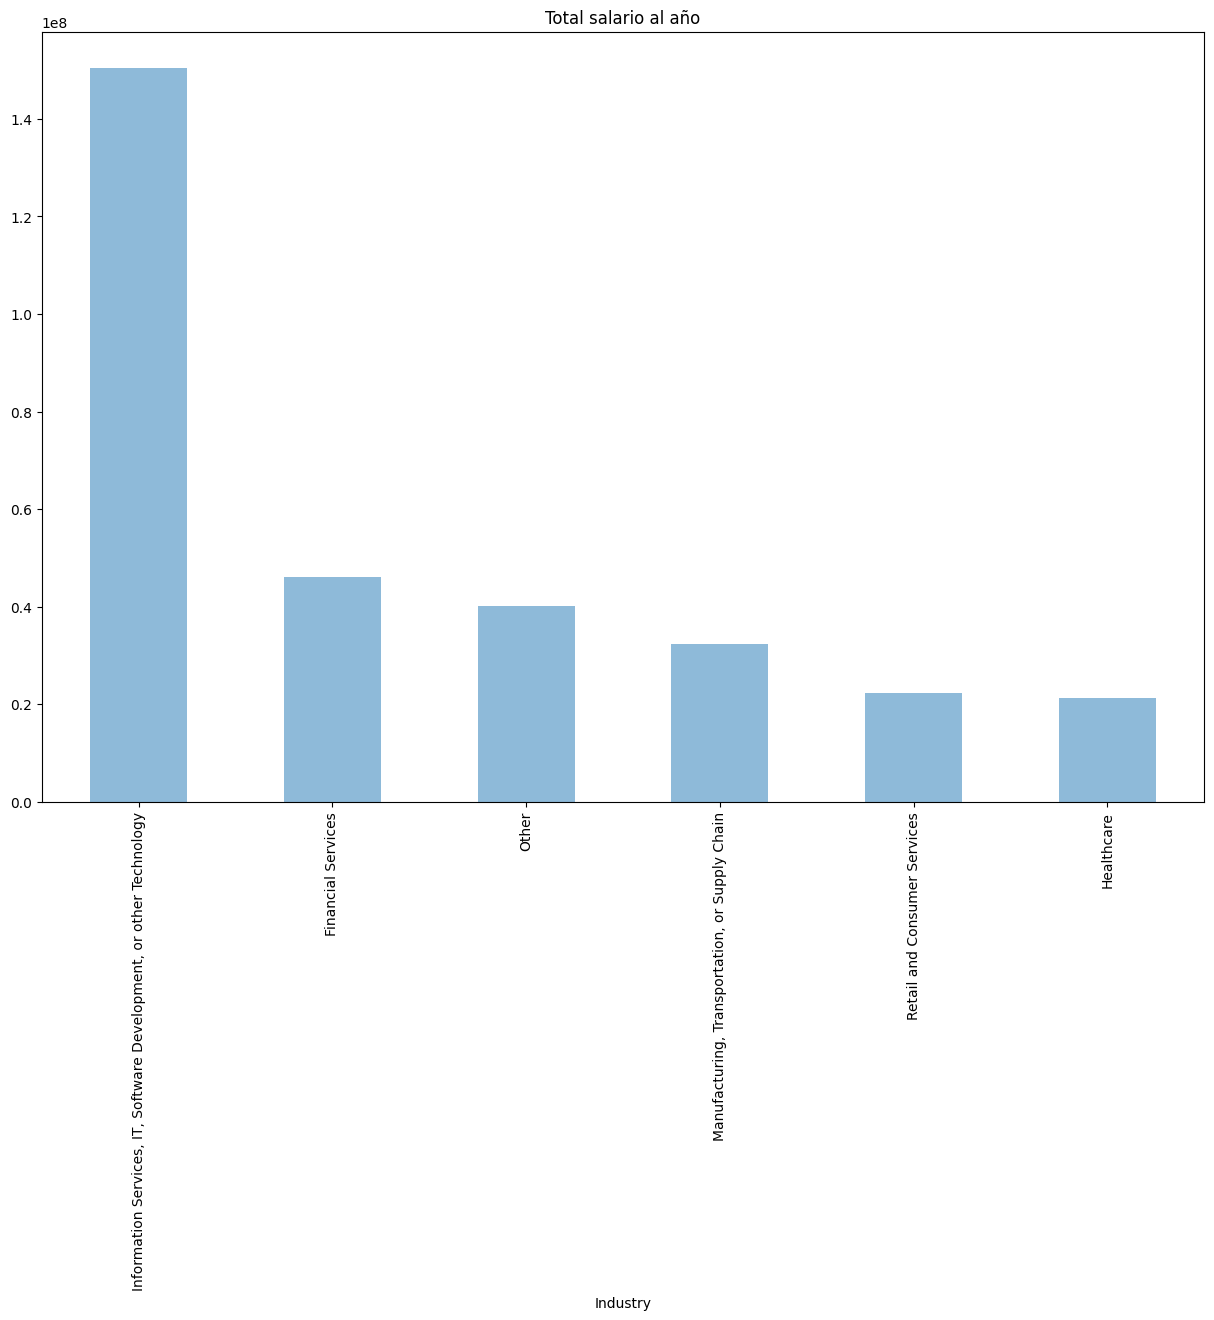

In [ ]:
graficatotalsalario= plt.figure(figsize=(15,10))
plt.title("Total salario al año")
(datos.groupby('Industry') ['ConvertedCompYearly'].sum()).sort_values(ascending=False).head(6).plot(kind="bar", alpha=0.5)


In [ ]:
datos.head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           10549 non-null  int64  
 1   Q120                                 10549 non-null  object 
 2   MainBranch                           10549 non-null  object 
 3   Age                                  10549 non-null  object 
 4   Employment                           10434 non-null  object 
 5   RemoteWork                           8728 non-null   object 
 6   CodingActivities                     8724 non-null   object 
 7   EdLevel                              10444 non-null  object 
 8   LearnCode                            10404 non-null  object 
 9   LearnCodeOnline                      8357 non-null   object 
 10  LearnCodeCoursesCert                 4076 non-null   object 
 11  YearsCode                   

**¿Qué porcentaje del total representa el tipo de trabajo Remoto de los empleados? **




In [ ]:
datos['RemoteWork'].unique()

array([nan, 'Remote', 'Hybrid (some remote, some in-person)', 'In-person'],
      dtype=object)

In [ ]:
datos['RemoteWork'].value_counts()

Remote                                  3664
Hybrid (some remote, some in-person)    3554
In-person                               1510
Name: RemoteWork, dtype: int64

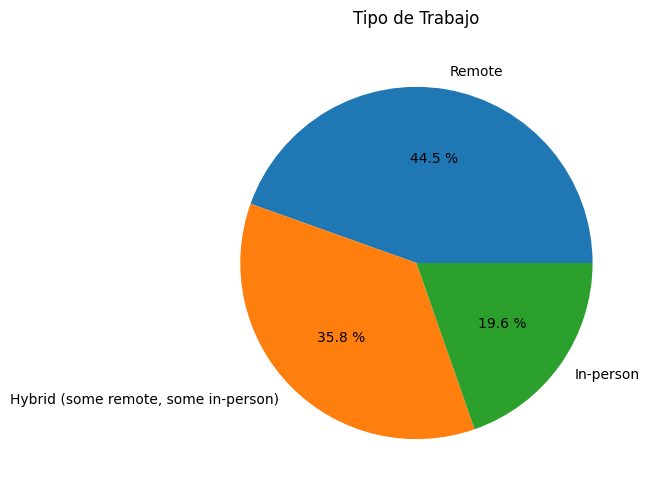

In [20]:
graficatorta= plt.figure(figsize=(5,6))
plt.title("Tipo de Trabajo")
lista=datos['RemoteWork'].value_counts()
lista1= ['Remote', 'Hybrid (some remote, some in-person)', 'In-person']
plt.pie(lista, labels=lista1,  autopct="%0.1f %%" )
plt.axis("equal")
plt.show()

**Cómo afecta la experiencia de código con el salario**

In [17]:
datos.groupby('YearsCode') ['ConvertedCompYearly'].sum().sort_values(ascending=False).head(10)

YearsCode
10    14711358.0
15     5757989.0
20     5099603.0
12     4313952.0
25     3162017.0
13     3033257.0
18     2954376.0
8      2789920.0
30     2763923.0
14     2458825.0
Name: ConvertedCompYearly, dtype: float64

<Axes: title={'center': 'Años Codigo'}, xlabel='YearsCode'>

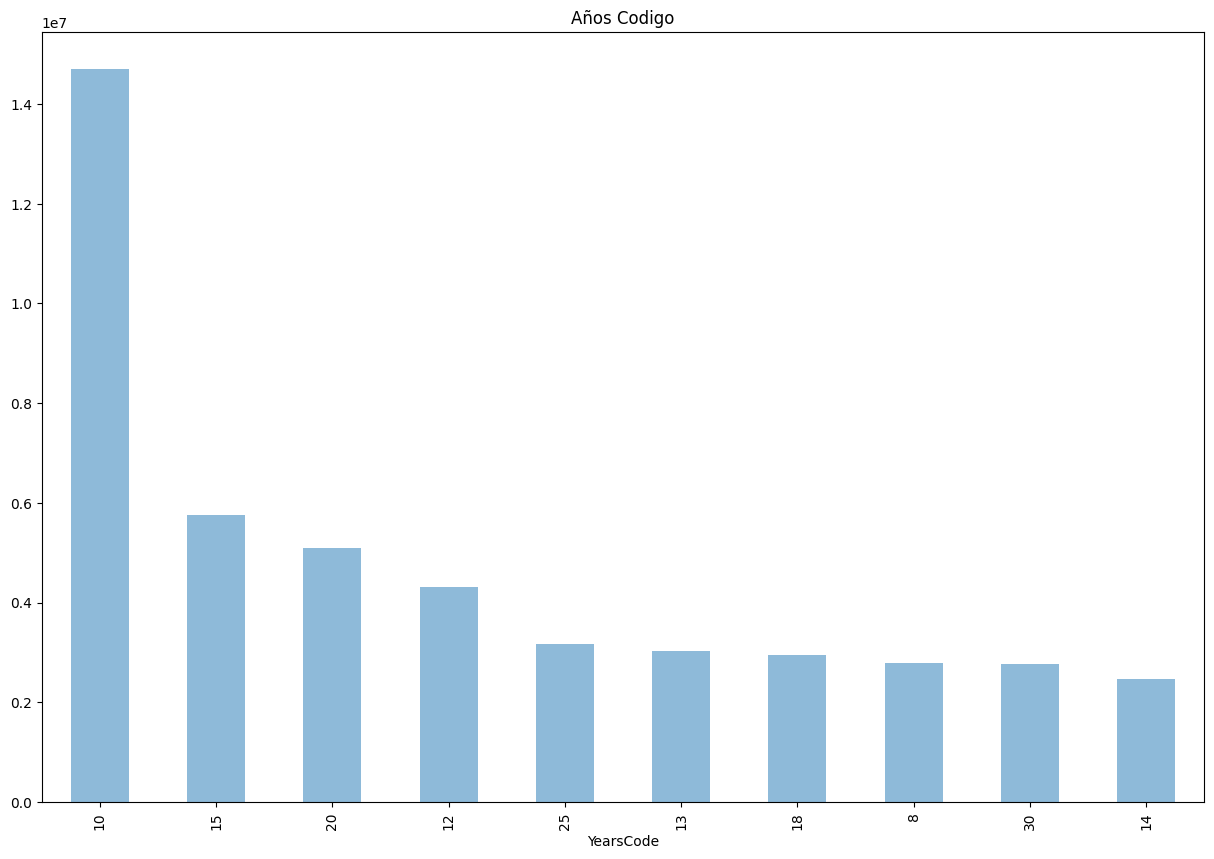

In [18]:
graficabarras= plt.figure(figsize=(15,10))
plt.title("Años Codigo")
datos.groupby('YearsCode') ['ConvertedCompYearly'].sum().sort_values(ascending=False).head(10).plot(kind="bar", alpha=0.5)

In [ ]:
datos['WorkExp']

0         NaN
1        10.0
2        23.0
3         7.0
4         6.0
         ... 
10544    20.0
10545    11.0
10546    15.0
10547     NaN
10548     NaN
Name: WorkExp, Length: 10549, dtype: float64

In [21]:
datos['LearnCode'].value_counts().sort_values(ascending=False).head(5)

Other online resources (e.g., videos, blogs, forum)                                                                                                                       110
Books / Physical media;Other online resources (e.g., videos, blogs, forum)                                                                                                 78
Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)                                                         62
Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum)                                                                 58
Books / Physical media;Online Courses or Certification;On the job training;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)     54
Name: LearnCode, dtype: int64

<Axes: title={'center': 'Metodo de estudio'}>

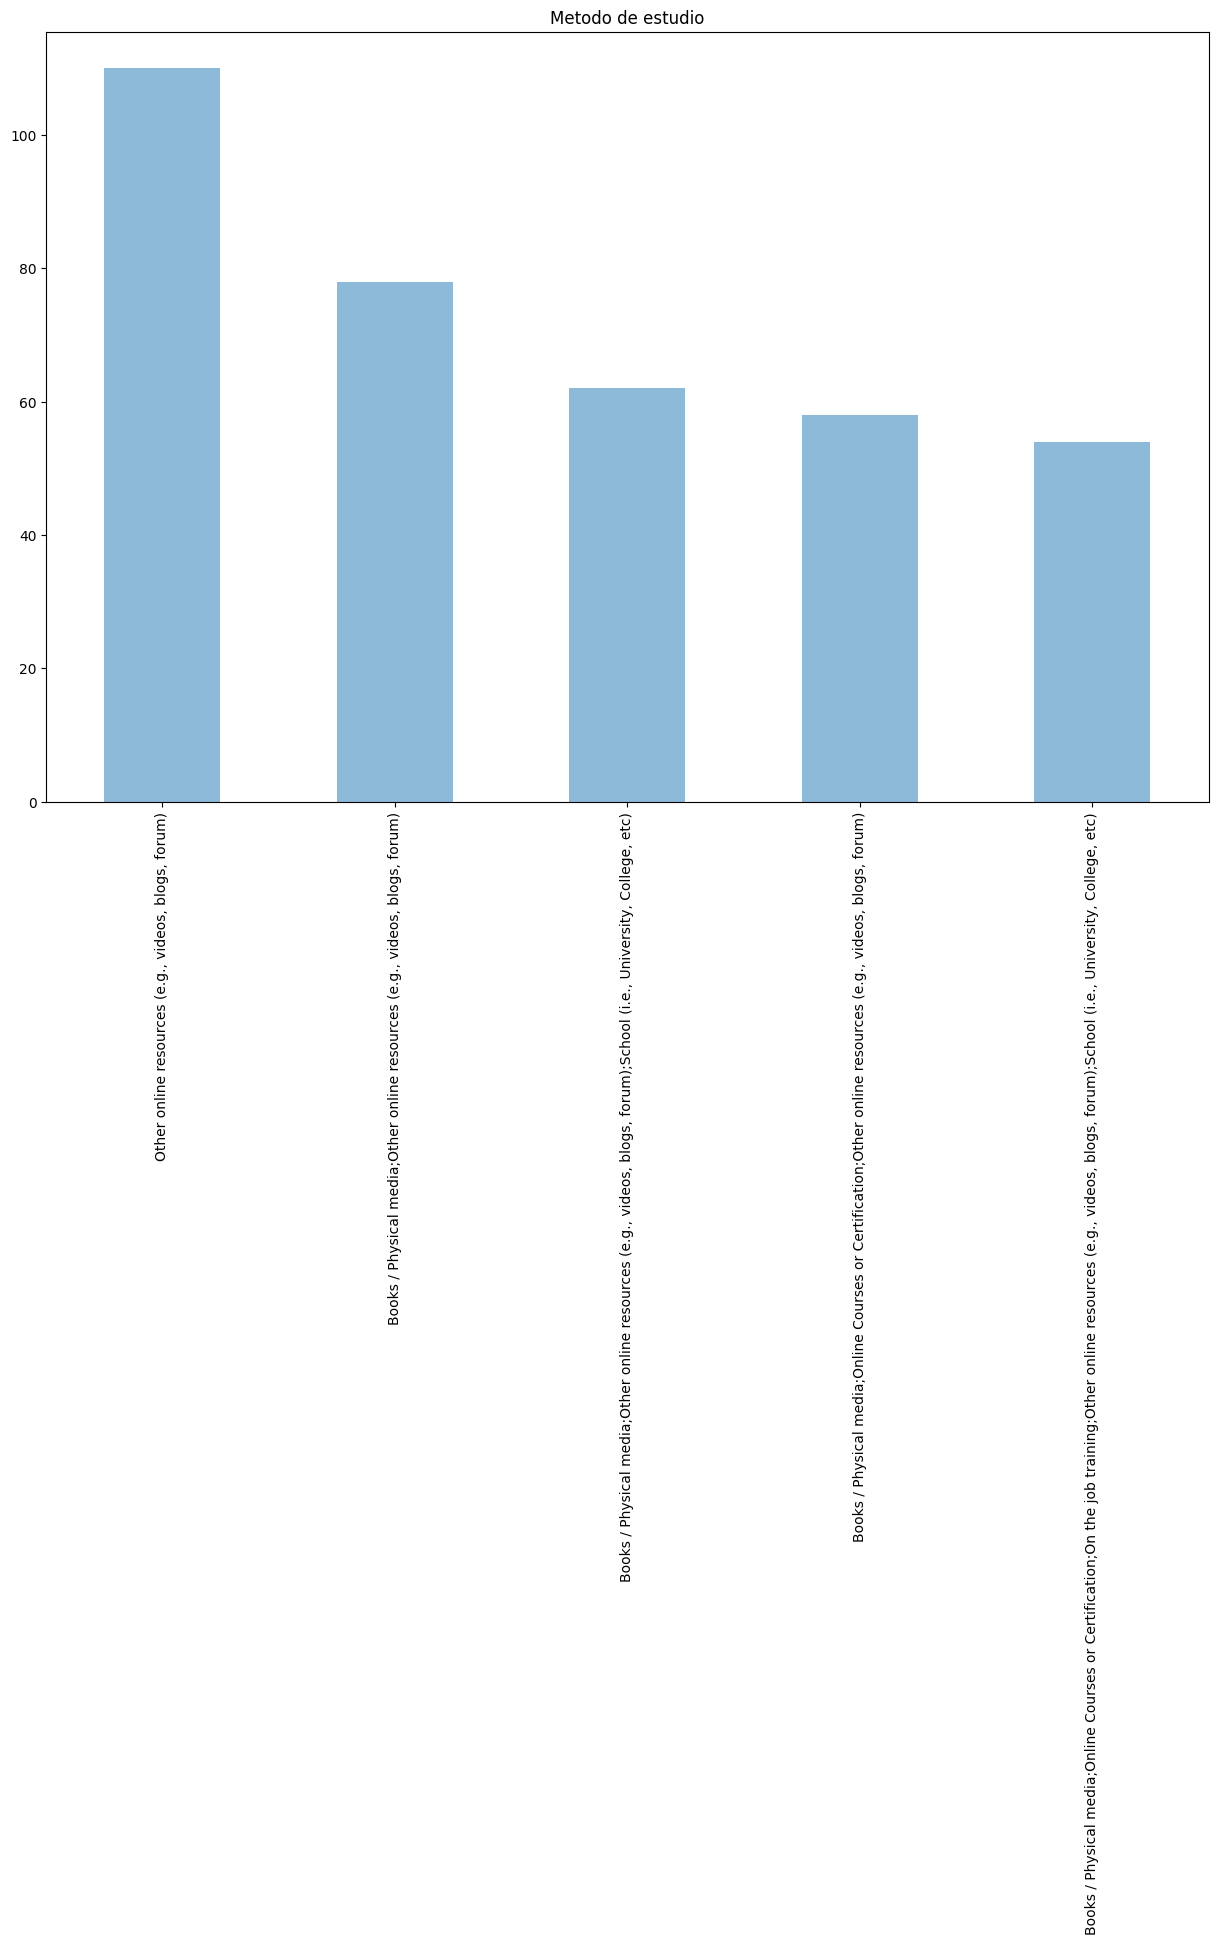

In [22]:
graficametodoestudio= plt.figure(figsize=(15,10))
plt.title("Metodo de estudio")
datos['LearnCode'].value_counts().sort_values(ascending=False).head(5).plot(kind="bar", alpha=0.5)

In [ ]:
datos.groupby(['LearnCode']).count().sort_values(by='ResponseId',ascending=False).head(5)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCodeOnline,LearnCodeCoursesCert,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
LearnCode,,,,,,,,,,,,,,,,,,,,,
"Other online resources (e.g., videos, blogs, forum)",619,619,619,619,619,421,420,619,619,0,...,206,204,202,214,214,208,183,606,611,224
"Books / Physical media;Other online resources (e.g., videos, blogs, forum)",491,491,491,491,490,380,380,491,485,0,...,198,198,194,199,198,195,176,483,484,231
"Books / Physical media;Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",408,408,408,408,408,323,323,408,407,0,...,174,174,168,177,177,175,154,401,404,209
"Other online resources (e.g., videos, blogs, forum);School (i.e., University, College, etc)",378,378,378,378,378,268,269,378,378,0,...,149,149,147,154,152,151,141,374,376,172
"Books / Physical media;Online Courses or Certification;Other online resources (e.g., videos, blogs, forum)",332,332,332,332,332,265,265,332,332,291,...,164,164,164,168,167,160,132,326,326,183


**¿Es más probable que consigas un trabajo como desarrollador si tienes una maestría?**

In [30]:
datos['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          693
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       468
Some college/university study without earning a degree                                205
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    189
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         78
Associate degree (A.A., A.S., etc.)                                                    51
Something else                                                                         44
Primary/elementary school                                                              35
Name: EdLevel, dtype: int64

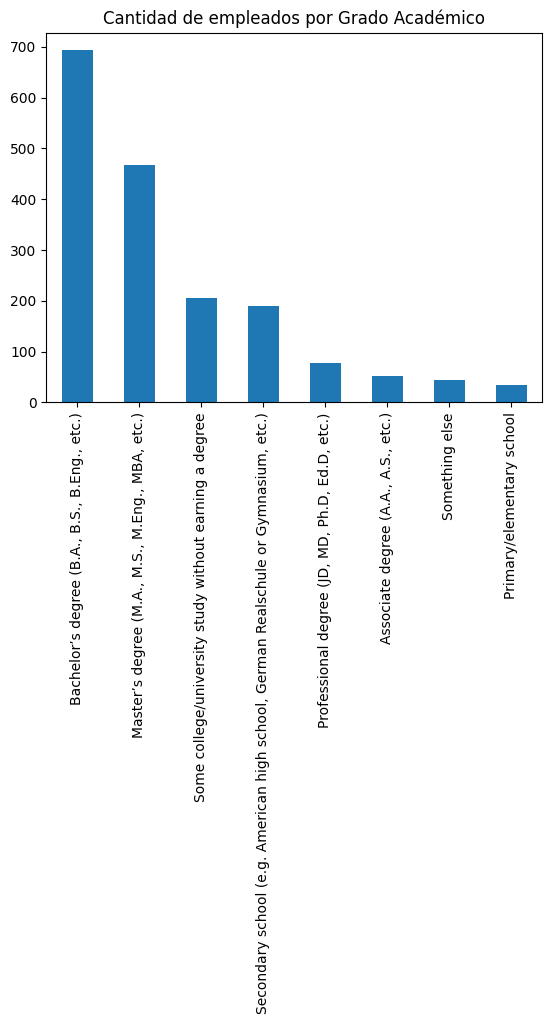

In [32]:
datos.EdLevel.value_counts().plot(kind="bar")
plt.title("Cantidad de empleados por Grado Académico")
plt.show()